In [956]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [805]:
df  = pd.read_csv(r"C:\Users\MANISH KOTNALA\Desktop\UPGRAD\ML\Logistic Regression\Lead Scoring Assignment\Leads.csv")

In [806]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [808]:
df.shape

(9240, 37)

In [809]:
#checking duplicates values for columns Lead Number and Prospect ID as both looks to have unique values

In [810]:
sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [811]:
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [812]:
#Since both columns have unique values i.e they are uniqe for every lead hence we can drop them.

In [813]:
df.drop(['Lead Number' , 'Prospect ID'],1,inplace = True)

DATA ANALYSIS .

In [814]:
#Replacing 'Select' with nan

In [815]:
df = df.replace('Select',np.nan)

In [816]:

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [817]:
#columns having null values
colmns = df.columns[df.isnull().any()]

In [818]:
colmns

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [819]:
#total null values in the dataframe
df.isnull().sum().sum()

54419

In [820]:
#percentage wise null values of the columns.
(df.isnull().sum()*100.0/df.shape[0])

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [821]:
#dropping columns having null value percentage more than 45%

In [822]:
for col in df.columns:
    if (df[col].isnull().sum()*100.0/df.shape[0]) >= 45:
           df.drop(col,1,inplace=True)

In [823]:
#checking shsape of the dataframe
df.shape

(9240, 28)

In [824]:
#checking null values again in dataframe
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [825]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [826]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

Categorical Columns Analysis

In [827]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [828]:
df['Lead Source'].isnull().sum()

36

In [829]:
#Replacing google and NaN with Google
df['Lead Source'].replace(["google",np.nan], 
           "Google", 
           inplace=True)

In [830]:
#also replacing all low frequency sub category as other.
df.replace(["bing",'Click2call','Press_Release','Live Chat','blog','youtubechannel','NC_EDM','welearnblog_Home','Par per Click Ads','WeLearn','testone'],'other',inplace=True)


In [831]:
#replacing Social Media with Fcebook
df.replace(['Social Media'],'Facebook',inplace =True)

In [832]:
df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               57
other                  20
Pay per Click Ads       1
Name: Lead Source, dtype: int64

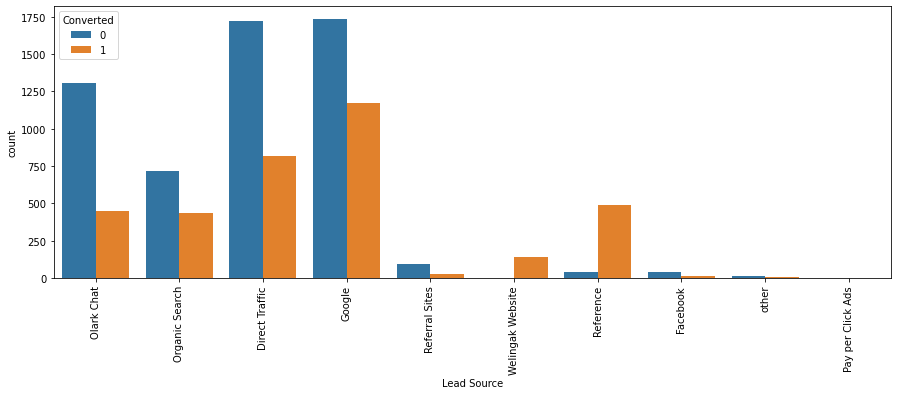

In [833]:
#plotting bar grpah for Lead Score 

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Below are the inght from above plot.
1. Maximum leads comes from Direct traffic and Google.
2. Maximum leads converted from google.
3. Social media is very less relevant.

In [834]:
#analysis of Country column's category
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Italy                      2
Philippines                2
China                      2
Asia/Pacific Region        2
Belgium                    2
Uganda                     2
Bangladesh                 2
Netherlands                2
Ghana                      2
Switzerland                1
Russia                     1
Indonesia                  1
Tanzania                   1
Vietnam                    1
Malaysia                   1
Liberia       

In [835]:
#since India have most frequency among the countries hence we can use it to replace unknow with India
df.replace('unknown','India',inplace  = True)

In [836]:
df['Country'].value_counts()

India                   6497
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
Nigeria                    4
Kuwait                     4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Italy                      2
Philippines                2
Ghana                      2
Belgium                    2
China                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
Switzerland                1
Russia                     1
Indonesia                  1
Tanzania                   1
Vietnam                    1
Malaysia                   1
Liberia                    1
Denmark       

In [837]:
#checking null values in the country category
df.Country.isnull().sum()

2461

In [838]:
df['Country'].replace(np.nan,'India',inplace = True)

In [839]:
#checking null value again
df.Country.isnull().sum()

0

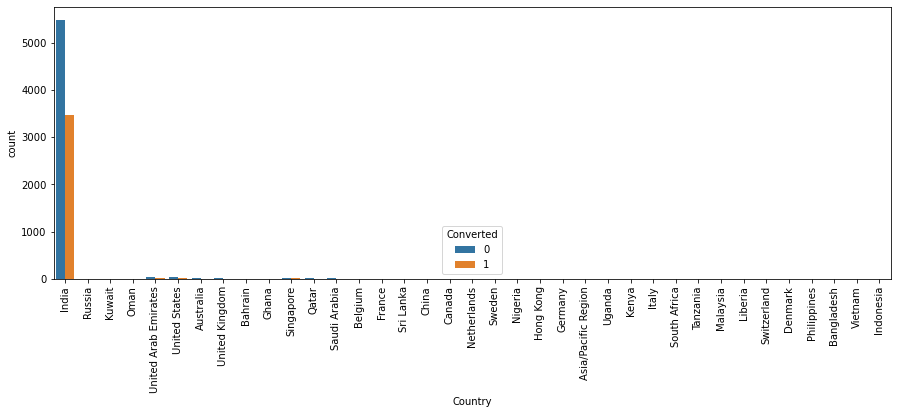

In [840]:
#plotting bar grpah for Lead Score 

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Country'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# As we can see number of values of India in Country is relatively very high than any other value hence this column is showing no varibility in categories hence we can drop it.

In [841]:
#dropping column country
df.drop('Country',1,inplace=True)

In [842]:
#analysis of City column
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [843]:
#checking for any Nan value in the column.
df['City'].isnull().sum()

3669

In [844]:
#we can replace Nan values with Mumbai 
df['City'].replace(np.nan,'Mumbai',inplace = True)

In [845]:
#checking null values again
df['City'].isnull().sum()

0

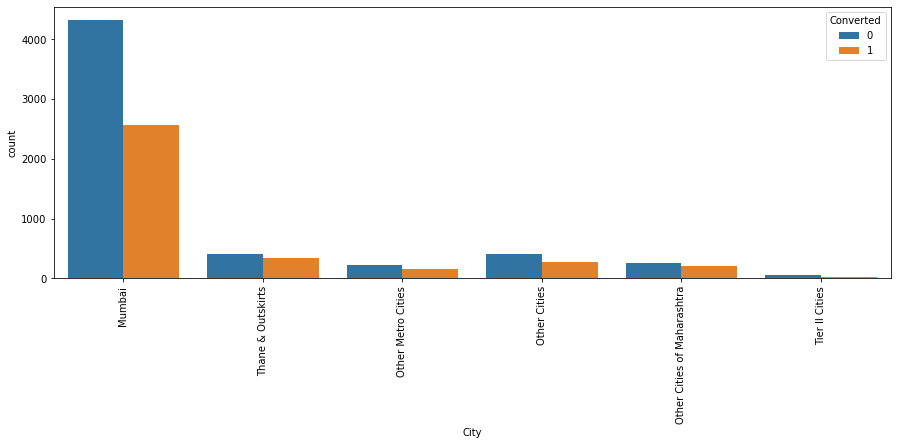

In [846]:
#plotting bar grpah for Lead Score 

plt.figure(figsize=(15,5))
s1=sns.countplot(df['City'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [847]:
#analysis of Specialization column
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [848]:
#checking null values in Specialization column
df.Specialization.isnull().sum()

3380

In [849]:
#null value in specialization can be because there is no specialization yet for the leads.
#hence we can replace the null value with the NA.

df.Specialization.replace(np.nan,'NA',inplace =True)

In [850]:
#we can club all management specialization
df.Specialization.replace(['Retail Management','Hospitality Management','IT Projects Management','Healthcare Management','Supply Chain Management','Finance Management','Human Resource Management','Marketing Management','Operations Management'],'Managment Specialization',inplace = True)

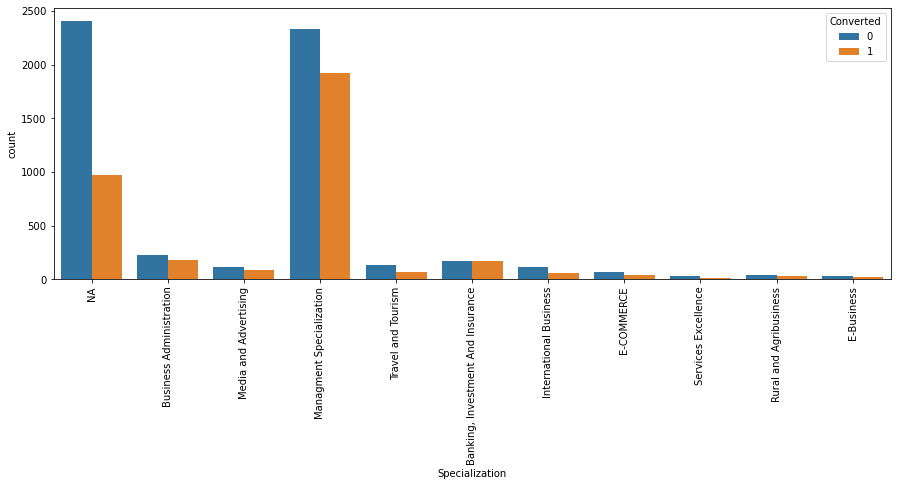

In [851]:
#plotting bar grpah for Lead Score 

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Specialization'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [852]:
# analysis of occupation category
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [853]:
#as there NAN values in occupation it might be the case where lead can be unemployed.
#hence we can impute the NaN with unemployed.

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

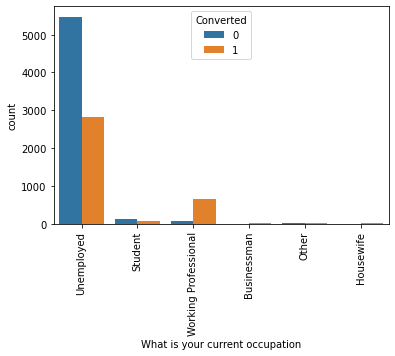

In [854]:
#plotting plot

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. Ratio of converting leads to successfull is large in working professional
2. Unemployed type have largest number of leads but ration of convertion of Leads is almost 50%

In [855]:
#checking value counts of What matters most to you in choosing a course

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

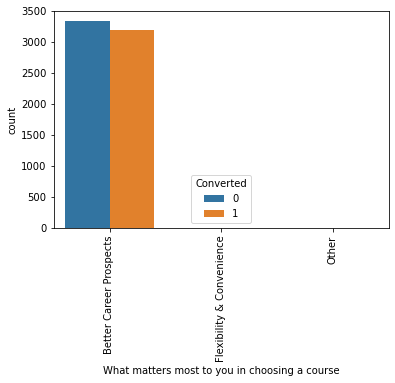

In [856]:
#plotting plot

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Only Better Career Prospects have significant value counts.
# If we replace null sub category with  Better Career Prospects there is no significane of this column are there will be only one sub category with almost more than 90% of values. Hence we can drop it.

In [857]:
df.drop('What matters most to you in choosing a course',1,inplace =True)

In [858]:
#checking visualizations of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [859]:
#null value in Tags can be because there is no Tags yet for the leads.
#hence we can replace the null value with the NA.

df.Tags.replace(np.nan,'NA',inplace =True)

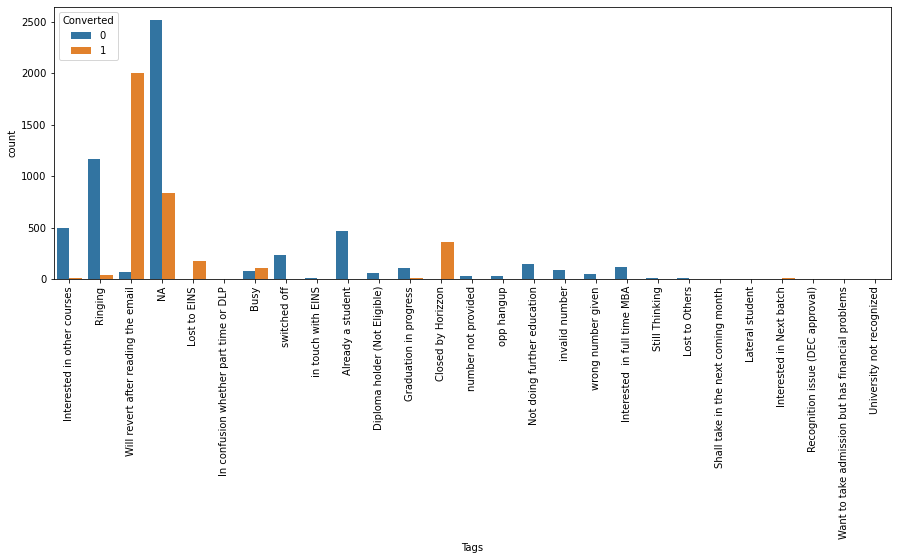

In [860]:

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [861]:
#there are many sub category with low frequency we can replace them with others.
#replacing tags with low frequency with "OtherTags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number','wrong number given','Interested  in full time MBA'], 'OtherTags')

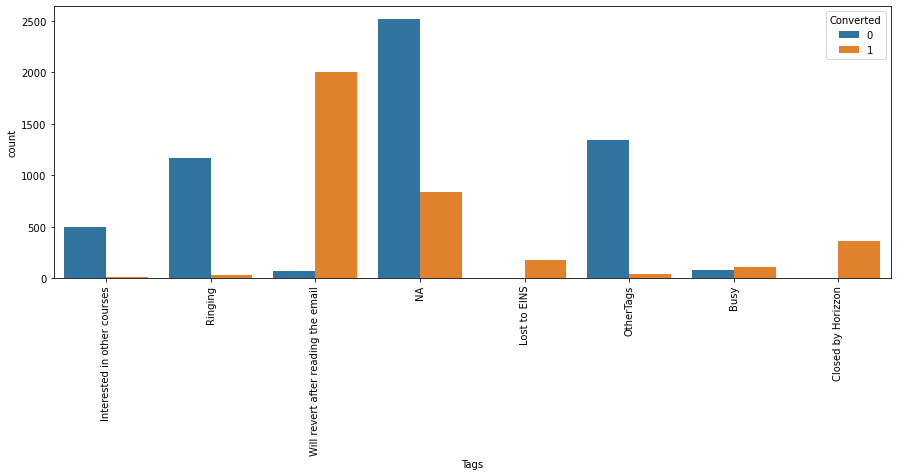

In [862]:
#plotting pot again
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [863]:
# analysis Lasr Activity
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [864]:
#we can combine Nan Values and other low frequency values and replace them with OtherActivity

df['Last Activity'] = df['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'OtherActivity')

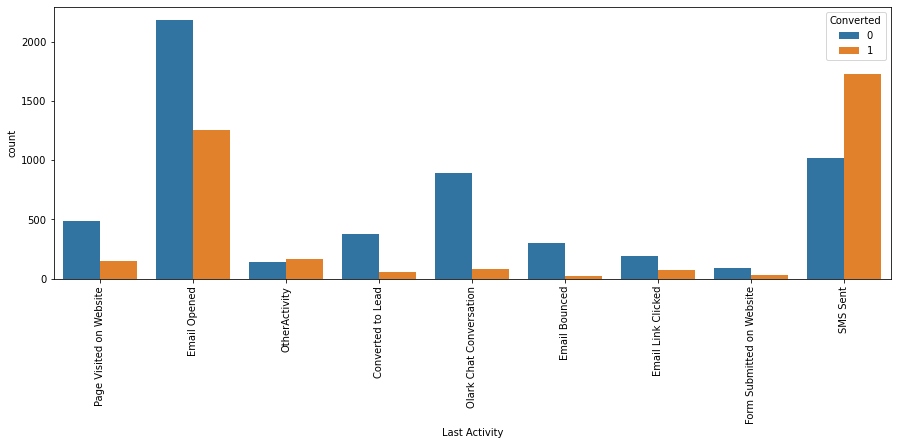

In [865]:
#plotting pot again
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Last Activity'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Analysis on above plot
1. Email open ahve largest count
2. SMS send have highest convertion rate

In [866]:
df.isnull().sum()

Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                                 0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [867]:
#Analysis Origin
df['Lead Origin'].value_counts(dropna=False)


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

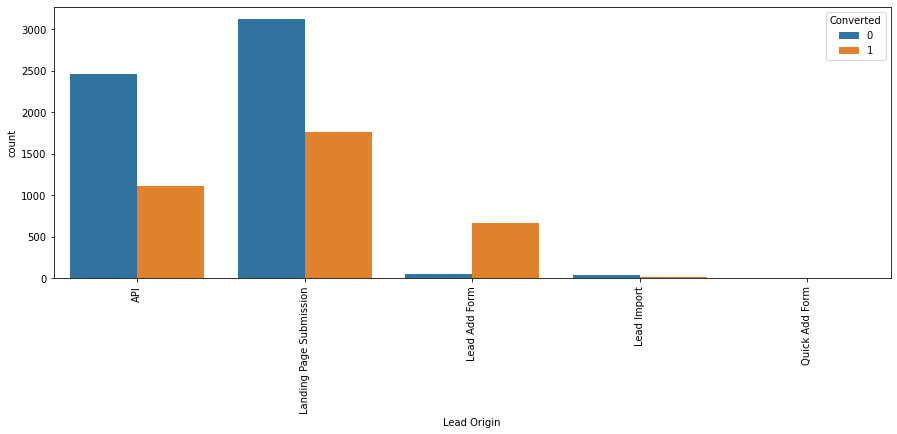

In [868]:
#plotting graph


plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. Lead Add Form submission Lead origin have highest ratio of conversion.
2. API and Landing Page Submission Lead origin have largest number of leads and conversions.
3. Lead origin with Lead add form have more conversion rate hence it should be given preference over other Lead origin.


In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

#Analysis of numerical variables.

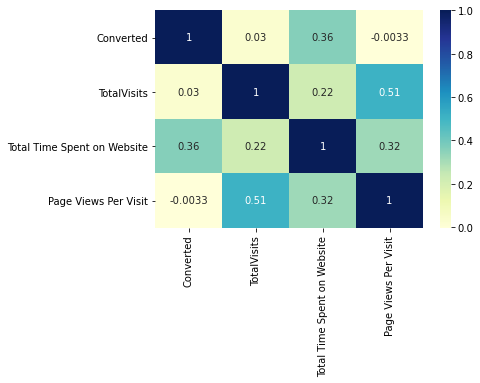

In [870]:
#Checking correlations of numeric values

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

1. 

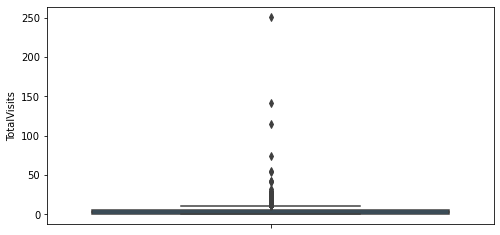

In [871]:
#Total Visits numerical analysis

plt.figure(figsize=(8,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

    There are outliers in TotalVisits

In [872]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

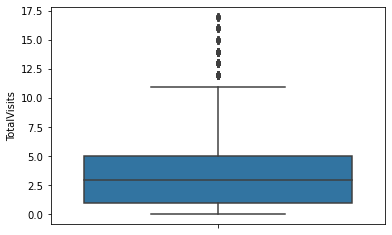

In [873]:
#removing outliers
df = df[(df.TotalVisits >= df.TotalVisits.quantile(0.01)) & (df.TotalVisits <= df.TotalVisits.quantile(0.99))]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [874]:
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

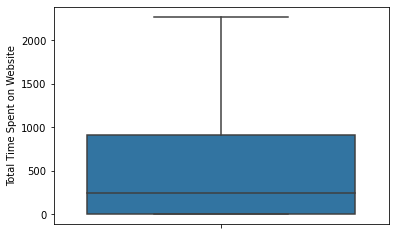

In [875]:

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

There are no outliers 

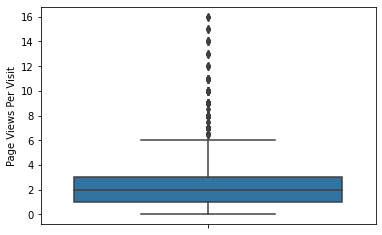

In [876]:

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

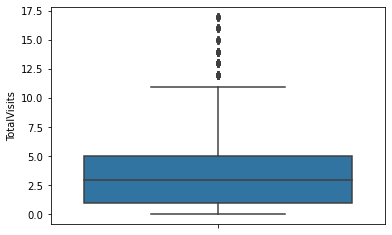

In [877]:
#treating outliers 

#removing outliers
df = df[(df['Page Views Per Visit'] >= df['Page Views Per Visit'].quantile(0.01)) & (df['Page Views Per Visit'] <= df['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y=df['TotalVisits'])
plt.show()


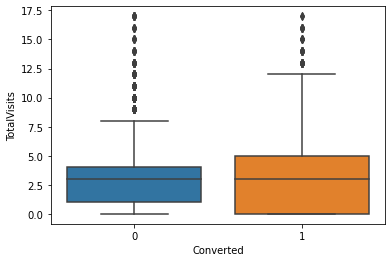

In [878]:
#checking conversion ration for TotalVisits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

1 TotalVisits have more coversion than non conversion.

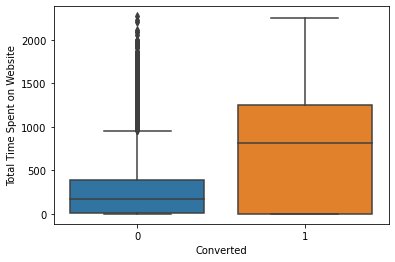

In [879]:
#checking conversion ratio for Total Time Spent on Website
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

Leads spends more Total Time Spent on Website have more conversion rate than who dont.

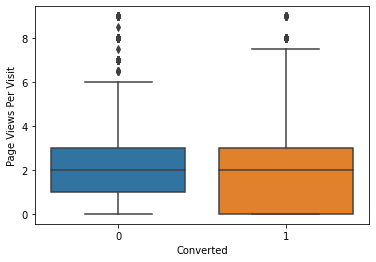

In [880]:
#checking Page Views Per Visit relation with Conversion

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Nothing concerete can be decided from above plot.

Dummy Variable Creation:

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               8953 non-null   object 
 1   Lead Source                               8953 non-null   object 
 2   Do Not Email                              8953 non-null   object 
 3   Do Not Call                               8953 non-null   object 
 4   Converted                                 8953 non-null   int64  
 5   TotalVisits                               8953 non-null   float64
 6   Total Time Spent on Website               8953 non-null   int64  
 7   Page Views Per Visit                      8953 non-null   float64
 8   Last Activity                             8953 non-null   object 
 9   Specialization                            8953 non-null   object 
 10  What is your current occupation     

In [882]:
df['A free copy of Mastering The Interview'].value_counts()

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [883]:
#mapping yes no to 1 and 0 respectively
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [884]:
df['A free copy of Mastering The Interview'].value_counts()

0    6155
1    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [885]:
df['Do Not Email'].value_counts()

No     8256
Yes     697
Name: Do Not Email, dtype: int64

In [886]:
#mapping yes no to 1 and 0 respectively
df['Do Not Email'] = df['Do Not Email'].map({'Yes':1,'No':0})

In [887]:
df['Do Not Email'].value_counts()

0    8256
1     697
Name: Do Not Email, dtype: int64

In [888]:
df['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

In [889]:
#creating summy values for the column
dummy_Lead = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
df = pd.concat([df,dummy_Lead],1)

In [890]:
dummy_Lead.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0


In [891]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
#dummy = dummy.drop(['Lead Source_Others'], 1)
dummy.head()
df = pd.concat([df, dummy], axis = 1)

In [892]:
dummy_last_activity = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
df = pd.concat([df, dummy_last_activity], axis = 1)

In [893]:
dummy_Notable_Activity = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
df = pd.concat([df, dummy_Notable_Activity], axis = 1)

In [894]:
dummy_Tag = pd.get_dummies(df['Tags'], prefix  = 'Tags')
df = pd.concat([df, dummy_Tag], axis = 1)

In [895]:
#getting all the columns of category type
category_col = df.select_dtypes(include=['object']).columns

In [896]:
category_col

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'Last Notable Activity'],
      dtype='object')

In [897]:
#dropping original category columns
df.drop(category_col,1,inplace = True)

In [898]:
#final dataframe after dummy variable creation
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_NA,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building 

In [899]:
#removing the taraget variable
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [900]:
# splitting data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [901]:
#analysis train data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   A free copy of Mastering The Interview                6267 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 7   Lead Origin_Lead Import                               6267 non-null   uint8  
 8   What is your current occupation_Housewife             6

In [902]:
#scaling the train data 
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_NA,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email
9196,-0.28572,0.668862,1.848117,1.455819,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4696,-0.28572,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3274,-0.28572,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2164,-0.28572,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,-0.667339,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [903]:
log = LogisticRegression()
rfe = RFE(log, 15)  
rfe = rfe.fit(X_train, y_train)

In [904]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True])

In [905]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 31),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('What is your current occupation_Housewife', False, 33),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 26),
 ('What is your current occupation_Unemployed', False, 19),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Other Cities', False, 25),
 ('City_Other Cities of Maharashtra', False, 38),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 42),
 ('City_Tier II Cities', False, 29),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Sou

In [906]:
#list of RFE supported columns
col_RFE = X_train.columns[rfe.support_]
col_RFE

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_OtherTags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [907]:
#list of RFE not supported columns
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_other', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
     

In [908]:
X_train_sm = sm.add_constant(X_train[col_RFE])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 26 Oct 2020   Deviance:                       2509.3
Time:                        05:01:46   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_OtherTags                                   -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

Since P value of column Lead Source_Referral Sites is high hence we can drop the column

In [909]:
col_RFE = col_RFE.drop('Lead Source_Referral Sites',1)

In [910]:
X_train_sm = sm.add_constant(X_train[col_RFE])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 26 Oct 2020   Deviance:                       2510.7
Time:                        05:01:46   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_OtherTags                                   -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

In [911]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_RFE].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_RFE].values, i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_OtherTags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


Dropping Last Notable Activity_SMS Sent columns as it have high VIF value

In [912]:
col_RFE = col_RFE.drop('Last Notable Activity_SMS Sent',1)

In [913]:
X_train_sm = sm.add_constant(X_train[col_RFE])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 26 Oct 2020   Deviance:                       2526.6
Time:                        05:01:46   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_OtherTags                                   -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [914]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_RFE].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_RFE].values, i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_OtherTags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


P value and VIF are low now for all the columns. Hence we can determine top 3 columns determining the conversion
1.	Tags_Closed by Horizzon
2.	Tags_Lost to EINS
3.	Tags_Will revert after reading the email


In [915]:
# Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [916]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [917]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [918]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [919]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 281 2104]]


In [920]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [921]:
TP = confusion[1,1]#total positive 
TN = confusion[0,0] # total negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [922]:
#sensitivity
TP / float(TP+FN)

0.8821802935010482

In [923]:
#specificity
TN / float(TN+FP)

0.9513137557959814

In [924]:
#False positive rate. predictive customer rate when customer does not have converted.
print(FP/ float(TN+FP))

0.04868624420401855


In [925]:
#positive preditive value
print (TP / float(TP+FP))

0.9175752289576974


In [926]:
#negative predictive value
print (TN / float(TN+ FN))

0.9292903875188727


Plotting ROC curve

In [927]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [931]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

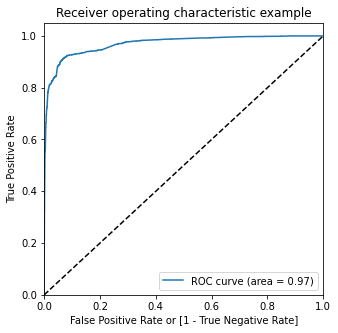

(array([0.       , 0.       , 0.       , ..., 0.9992272, 0.9994848,
        1.       ]),
 array([0.00000000e+00, 4.19287212e-04, 2.09643606e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99999356e+00, 9.99993561e-01, 9.99986254e-01, ...,
        4.13779388e-04, 4.11101187e-04, 4.02516124e-04]))

In [932]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.
Calculating the area under the curve(GINI)

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [938]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [939]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726



Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [937]:
#columns with different cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


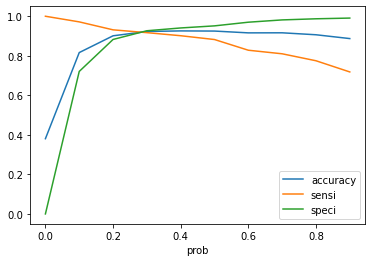

In [941]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above point 0.3 is optimal cut-off point

In [942]:
#now getting final preicted value for 0.3 cut-off value
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [943]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [944]:
# the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

In [945]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [946]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8821802935010482

In [947]:
# specificity
TN / float(TN+FP)

0.9513137557959814

Following are the insight from above

Accuracy : 92.22%
Sensitivity : 88.21%
Specificity : 95.13%

In [948]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04868624420401855


In [949]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9175752289576974


In [950]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292903875188727


In [951]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [952]:
#Precision

TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8847087378640777

In [953]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [957]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8847087378640777

In [958]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [959]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

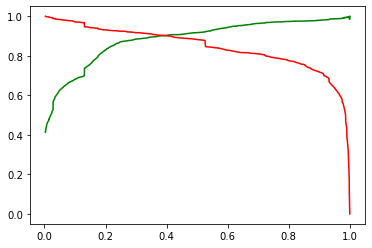

In [960]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [961]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_NA,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.301634,0.575687,-0.311318,0.092860,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
984,-0.301634,-0.090676,-0.550262,0.356568,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8135,3.315278,-0.423857,0.812462,-0.170849,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6915,-0.301634,0.242505,-0.628665,-0.170849,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.301634,-0.090676,-0.421456,0.356568,-0.690388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [963]:
X_test = X_test[col_RFE]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [964]:
X_test_sm = sm.add_constant(X_test)

Prediction On Test-Set

In [965]:
y_test_pred = res.predict(X_test_sm)

In [966]:
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [967]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [968]:
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [969]:
y_test_df = pd.DataFrame(y_test)

In [970]:
y_test_df['Prospect ID'] = y_test_df.index

In [971]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [972]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [973]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [974]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [975]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [976]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [977]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [979]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [980]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


In [981]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

In [982]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [983]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [984]:
TP / float(TP+FN)

0.9198019801980198

In [985]:
TN / float(TN+FP)

0.9325775656324582

In [986]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [987]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

Observations:
Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%
